# Student Study Performance

This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course

# Dataset Feature Overview

This data set consists of the marks secured by the students in various subjects\
gender : sex of students -> (Male/female)\
race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,- high school)\
lunch : having lunch before test (standard or free/reduced)\
test preparation course : complete or not complete before test\
math score\
reading score\
writing score

## Import The Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
import joblib

## Reading DataSet

In [2]:
# Reading Data
data = pd.read_csv("study_performance.csv")
data

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [3]:
data.sample()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
861,female,group E,master's degree,free/reduced,none,81,86,87


In [4]:
data.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

## Exploratory Data Analysis (EDA)

EDA (Exploratory Data Analysis) is a process that involves understanding the data by calculating statistics and creating visualizations such as charts and figures. The purpose of EDA is to discover patterns, relationships, and anomalies in the data that could have an impact on our analysis.

In [5]:
data.shape

(1000, 8)

In [6]:
# columns data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
# Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution
data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,1000,2,female,518,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race_ethnicity,1000,5,group C,319,NaN,NaN,NaN,NaN,NaN,NaN,NaN
parental_level_of_education,1000,6,some college,226,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lunch,1000,2,standard,645,NaN,NaN,NaN,NaN,NaN,NaN,NaN
test_preparation_course,1000,2,none,642,NaN,NaN,NaN,NaN,NaN,NaN,NaN
math_score,1000.0,NaN,NaN,NaN,66.089,15.16308,0.0,57.0,66.0,77.0,100.0
reading_score,1000.0,NaN,NaN,NaN,69.169,14.600192,17.0,59.0,70.0,79.0,100.0
writing_score,1000.0,NaN,NaN,NaN,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [8]:
# To check the number of unique values in each column
num_unique = data.nunique()
num_unique

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [9]:
# count the number of duplicate rows
data.duplicated().sum()

0

In [10]:
# count the number of missing values (NaN values) in each column.
data.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

## Feature Engineering And Visualization

### Neumerical Features

#### Handle Neumerical Features

In [11]:
#segrate the feature
numerical_features = [feature for feature in data.columns if data[feature].dtype!='O']
numerical_features

['math_score', 'reading_score', 'writing_score']

In [12]:
data['total score'] = data['math_score'] + data['reading_score'] + data['writing_score']
data['Average_Score'] = data['total score']/3
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,Average_Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [13]:
reading_full = data[data['reading_score'] == 100]['Average_Score'].count()
writing_full = data[data['writing_score'] == 100]['Average_Score'].count()
math_full = data[data['math_score'] == 100]['Average_Score'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [14]:
reading_less_20 = data[data['reading_score'] < 50]['Average_Score'].count()
writing_less_20 = data[data['writing_score'] < 50]['Average_Score'].count()
math_less_20 = data[data['math_score'] < 50]['Average_Score'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 135
Number of students with less than 20 marks in Writing: 114
Number of students with less than 20 marks in Reading: 90


### Visualization

C:\Users\moham\anaconda3\envs\Ai\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\moham\anaconda3\envs\Ai\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\moham\anaconda3\envs\Ai\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\moham\anaconda3\envs\Ai\Lib\site-packages\seaborn\_oldcore.py:1075: FutureW

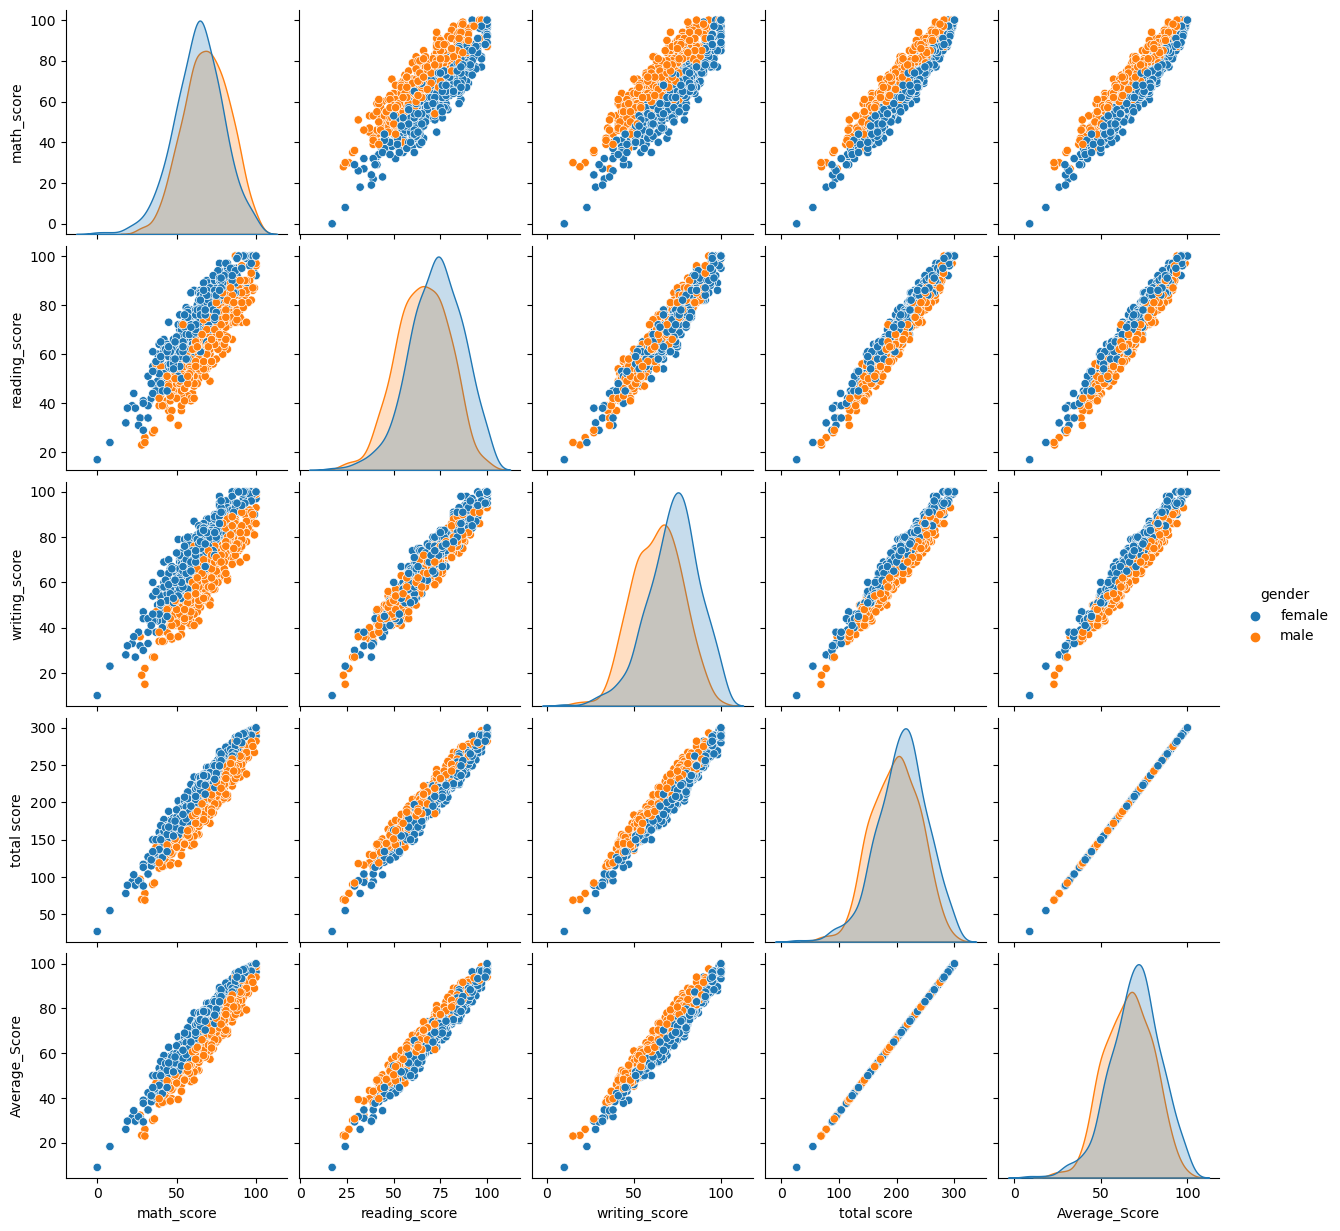

In [15]:
sns.pairplot(data,hue = 'gender')
plt.show()

C:\Users\moham\anaconda3\envs\Ai\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\moham\anaconda3\envs\Ai\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\moham\anaconda3\envs\Ai\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\moham\anaconda3\envs\Ai\Lib\site-packages\seaborn\_oldcore.py:1075: FutureW

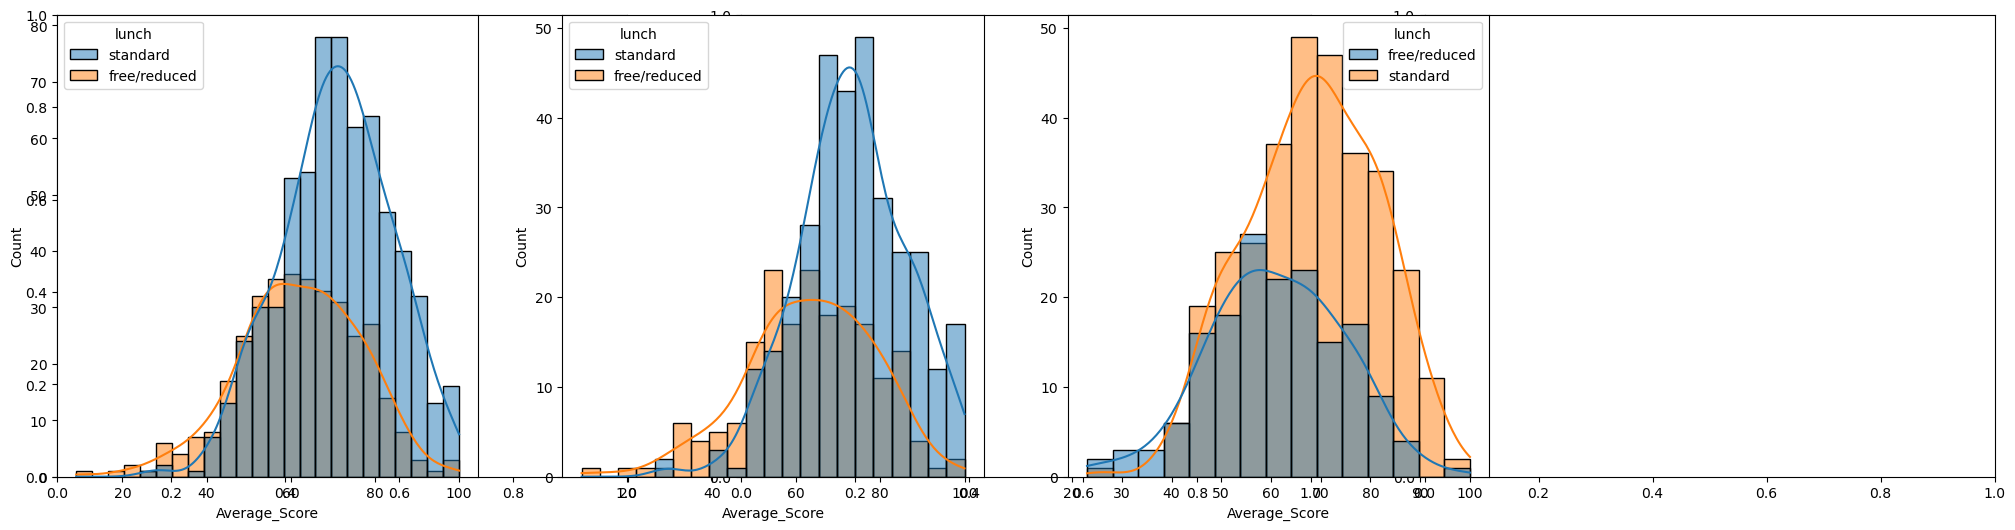

In [16]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=data,x='Average_Score',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=data[data.gender=='female'],x='Average_Score',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=data[data.gender=='male'],x='Average_Score',kde=True,hue='lunch')
plt.show()

C:\Users\moham\anaconda3\envs\Ai\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\moham\anaconda3\envs\Ai\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\moham\anaconda3\envs\Ai\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\moham\anaconda3\envs\Ai\Lib\site-packages\seaborn\_oldcore.py:1075: FutureW

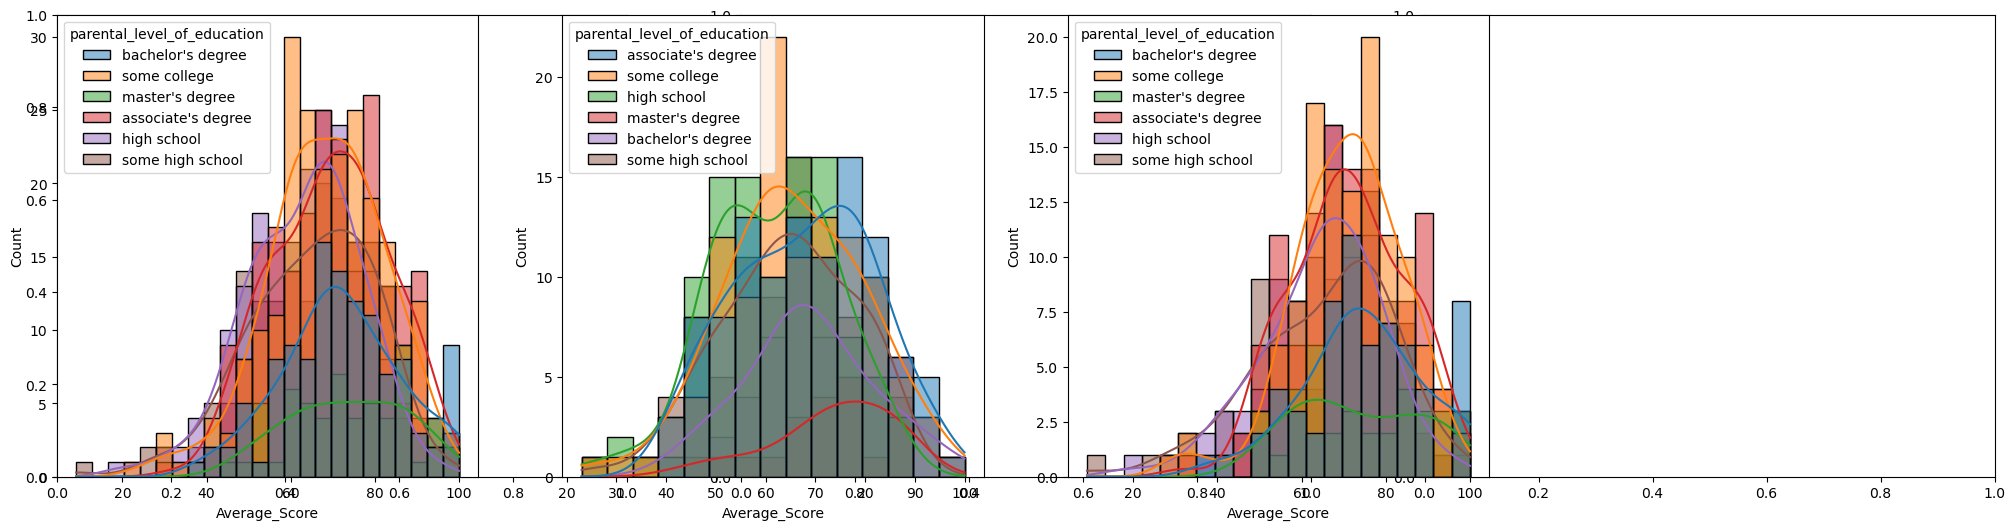

In [17]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=data,x='Average_Score',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=data[data.gender=='male'],x='Average_Score',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=data[data.gender=='female'],x='Average_Score',kde=True,hue='parental_level_of_education')
plt.show()

C:\Users\moham\anaconda3\envs\Ai\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\moham\anaconda3\envs\Ai\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\moham\anaconda3\envs\Ai\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\moham\anaconda3\envs\Ai\Lib\site-packages\seaborn\_oldcore.py:1075: FutureW

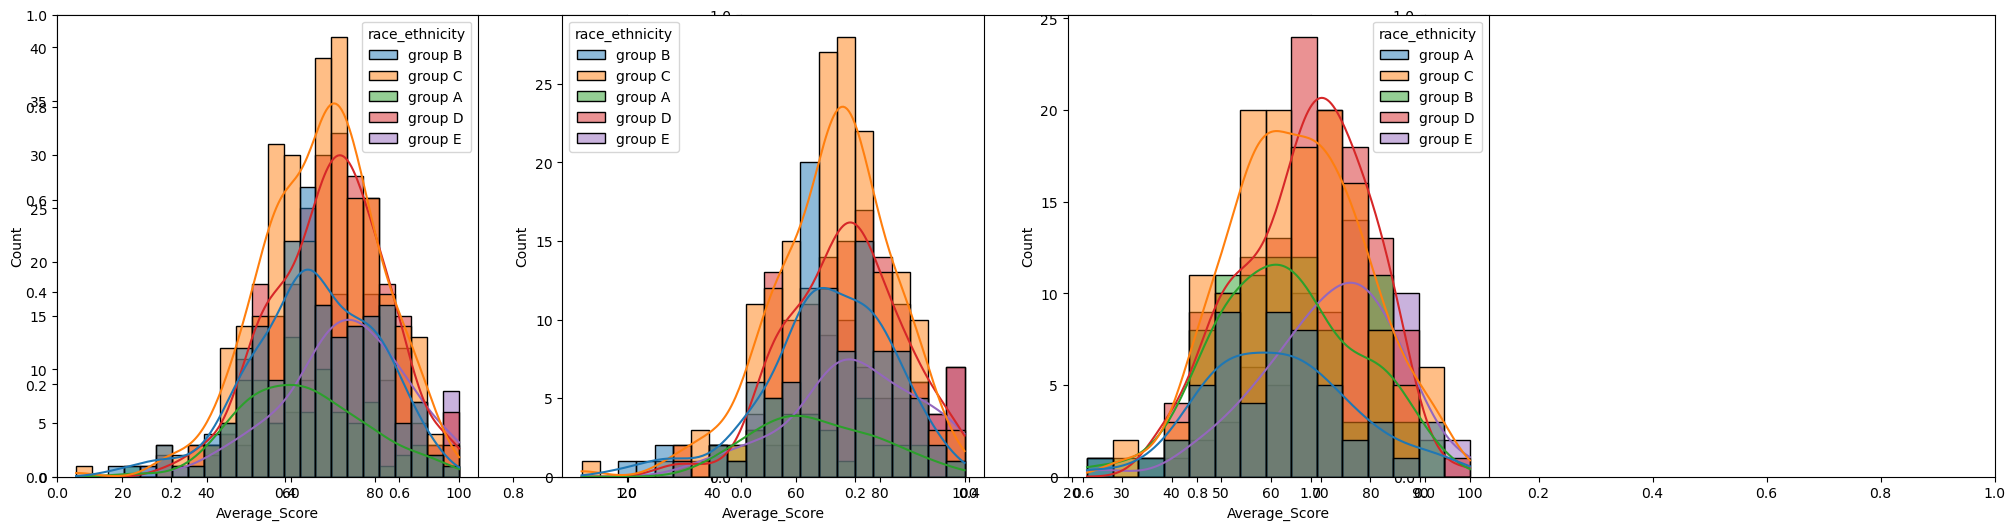

In [18]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=data,x='Average_Score',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=data[data.gender=='female'],x='Average_Score',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=data[data.gender=='male'],x='Average_Score',kde=True,hue='race_ethnicity')
plt.show()

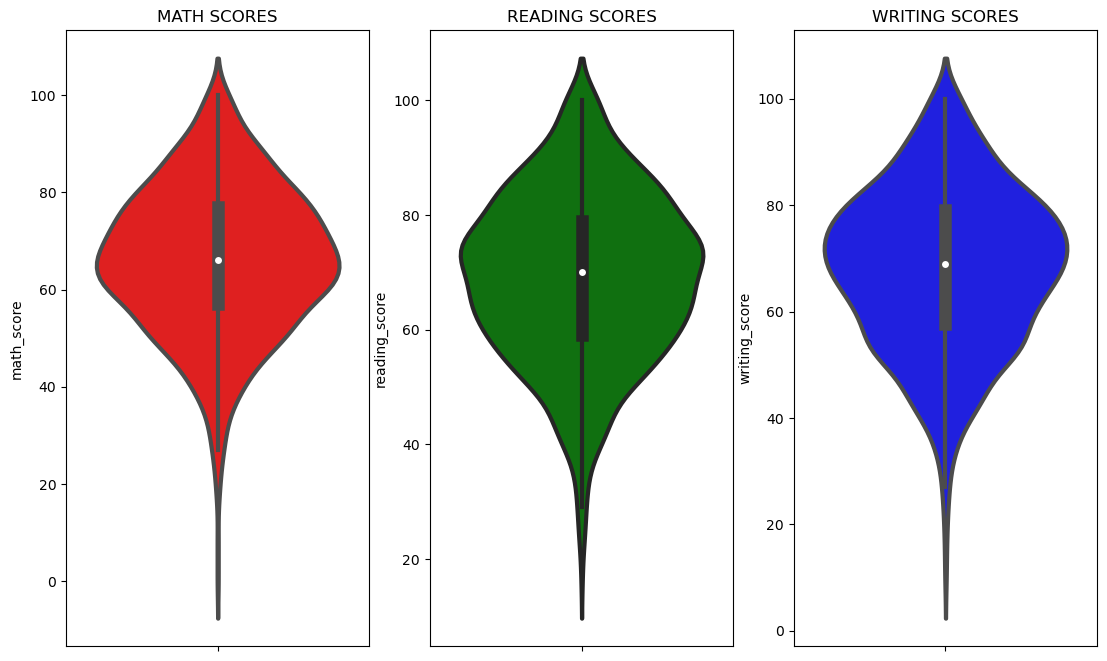

In [19]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=data,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=data,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=data,color='blue',linewidth=3)
plt.show()

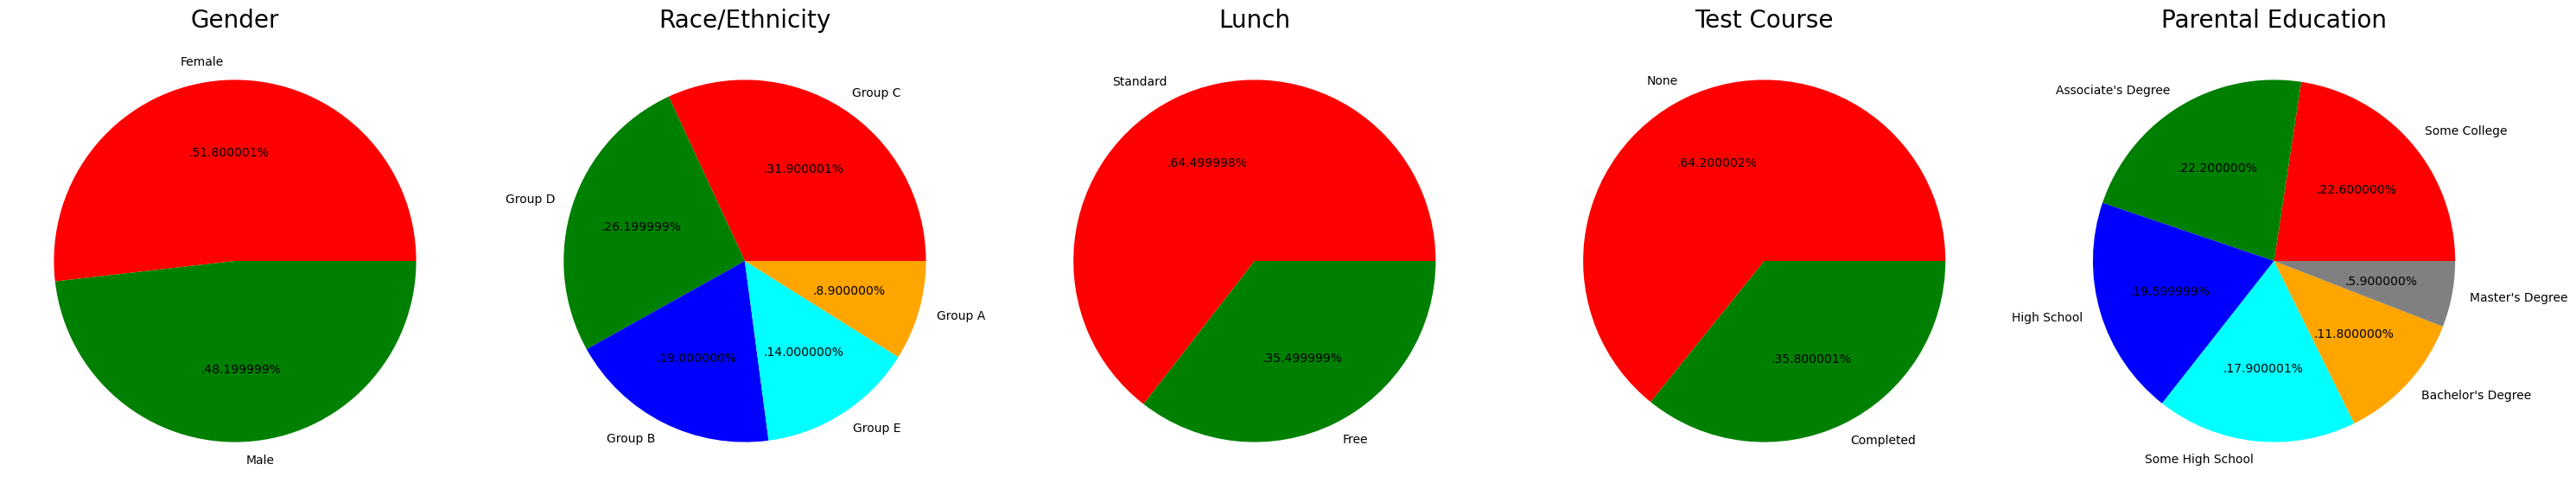

In [20]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = data['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']

plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 2)
size = data['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = data['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 4)
size = data['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 5)
size = data['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')

plt.tight_layout()
plt.grid()

plt.show()

### Categorical Features

#### Handle Categorical Features

In [21]:
categorical_features = [feature for feature in data.columns if data[feature].dtype =='O']
categorical_features

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [22]:
data[categorical_features]

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none
...,...,...,...,...,...
995,female,group E,master's degree,standard,completed
996,male,group C,high school,free/reduced,none
997,female,group C,high school,free/reduced,completed
998,female,group D,some college,standard,completed


In [23]:
# Initialize the OneHotEncoder object
encoder = OneHotEncoder()

# Fit and transform the data using the encoder
encoded_data = encoder.fit_transform(data[['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']])

# Get the feature names from the encoder
feature_names = encoder.get_feature_names_out(['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course'])

# Convert the encoded data into a DataFrame
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=feature_names)

# Concatenate the encoded DataFrame with the original data
final_data = pd.concat([data, encoded_df], axis=1)

In [24]:
# Drop the original columns
original_columns = ['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']
final_data = final_data.drop(original_columns, axis=1)

In [25]:
final_data.head()

,math_score,reading_score,writing_score,total score,Average_Score,gender_female,gender_male,race_ethnicity_group A,race_ethnicity_group B,race_ethnicity_group C,...,parental_level_of_education_associate's degree,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_master's degree,parental_level_of_education_some college,parental_level_of_education_some high school,lunch_free/reduced,lunch_standard,test_preparation_course_completed,test_preparation_course_none
0,72,72,74,218,72.666667,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,69,90,88,247,82.333333,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,90,95,93,278,92.666667,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,47,57,44,148,49.333333,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,76,78,75,229,76.333333,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [26]:
final_data.dtypes

math_score                                          int64
reading_score                                       int64
writing_score                                       int64
total score                                         int64
Average_Score                                     float64
gender_female                                     float64
gender_male                                       float64
race_ethnicity_group A                            float64
race_ethnicity_group B                            float64
race_ethnicity_group C                            float64
race_ethnicity_group D                            float64
race_ethnicity_group E                            float64
parental_level_of_education_associate's degree    float64
parental_level_of_education_bachelor's degree     float64
parental_level_of_education_high school           float64
parental_level_of_education_master's degree       float64
parental_level_of_education_some college          float64
parental_level

In [27]:
final_data.shape

(1000, 22)

## Divide the dataset

#### Divide the dataset into independent and dependent

In [28]:
X = final_data.drop(columns=['math_score', 'total score', 'Average_Score'], axis=1)
y = final_data['math_score']

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Models

### Linear regression Model

In [30]:
from sklearn.linear_model import LinearRegression
# creates an instance of the LinearRegression class from a machine learning library
regression=LinearRegression()

In [31]:
# fits the linear regression model to the training data.
regression.fit(X_train,y_train)

LinearRegression()

In [32]:
# retrieves the coefficients of the fitted linear regression model.
regression.coef_

array([ 0.23602256,  0.72414793, -6.53244193,  6.53244193, -0.80262367,
       -0.44330087, -1.42824083, -1.41585991,  4.09002528, -0.09454143,
       -0.81144256,  0.83477083, -1.49503027,  0.90431471,  0.66192873,
       -1.75503744,  1.75503744, -1.64482118,  1.64482118])

In [33]:
#  intercept or the y-intercept of a regression model
regression.intercept_

-0.08303154866129603

In [34]:
## prediction
y_pred=regression.predict(X_test)

In [35]:
# These functions are commonly used to evaluate the performance of regression models.
mse=mean_squared_error(y_test,y_pred)
print(mse)
mae=mean_absolute_error(y_test,y_pred)
print(mae)
print(np.sqrt(mse))

29.09516986671545
4.21476314247485
5.39399386973284


In [36]:
# Accuracy r2 and adjusted r square
score=r2_score(y_test,y_pred)
score

0.8804332983749567

In [37]:
#display adjusted R-squared
1 - (1-score)*(len(y)-1)/(len(y)-X.shape[1]-1)

0.8781151684454915

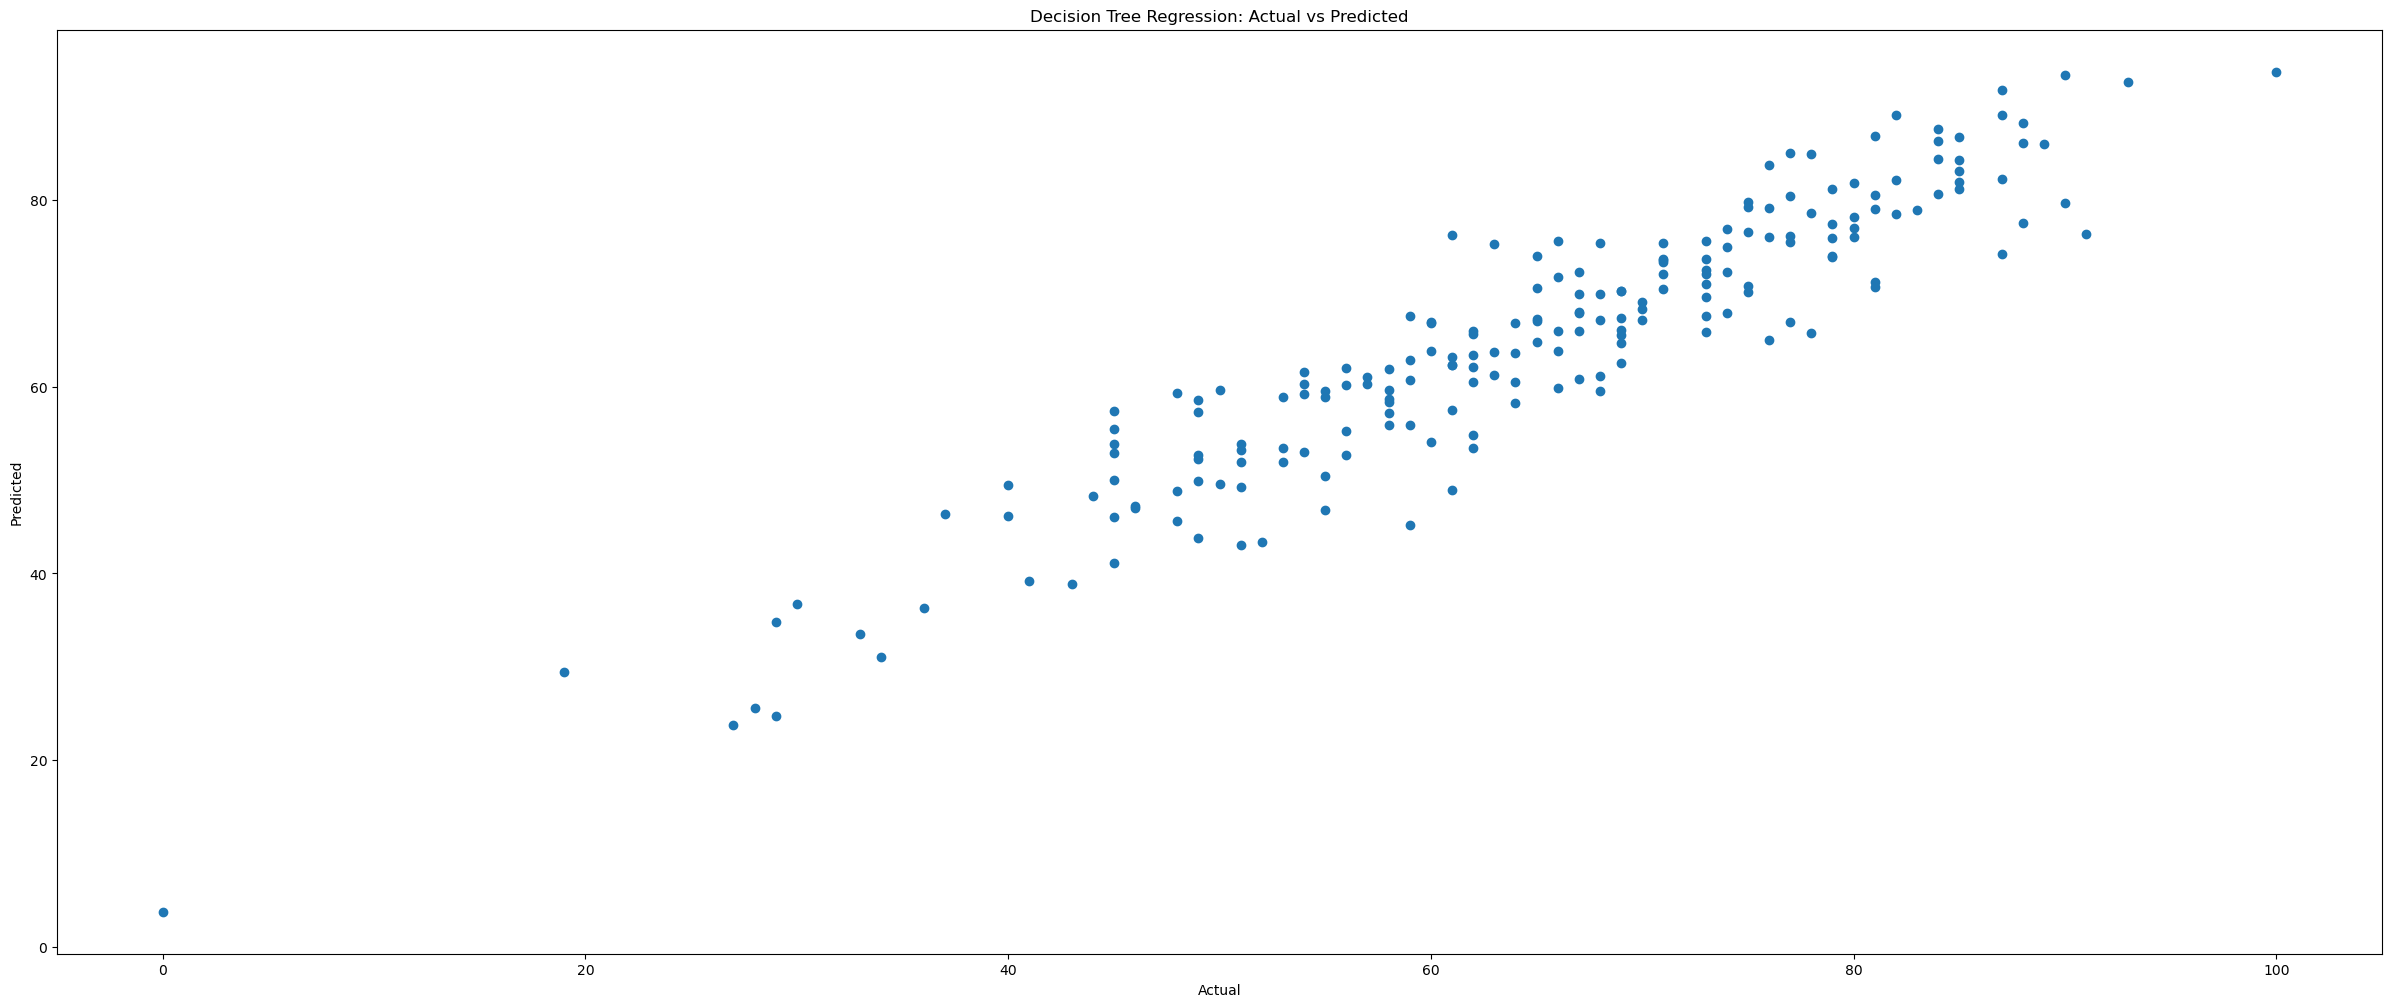

In [38]:
# Plot the actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Decision Tree Regression: Actual vs Predicted')
plt.show()

In [39]:
# Save the trained model to a file
joblib.dump(regression, 'regression_model.pkl')

['regression_model.pkl']

### Decision Tree Model

In [40]:
from sklearn.tree import DecisionTreeRegressor
# Create a decision tree regressor object with the criterion set to "mse"
DT_regressor = DecisionTreeRegressor(random_state=100)
# Fit the regressor to the training data
DT_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=100)

In [41]:
#Predict the response for test dataset
DT_y_pred= DT_regressor.predict(X_test)

In [42]:
# Evaluate the model's performance using mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 29.09516986671545


In [43]:
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error (MAE):', mae)

Mean Absolute Error (MAE): 4.21476314247485


In [44]:
# Calculate the R-squared (R2) score between the actual and predicted target variable values
score = r2_score(y_test, y_pred)
print('R-squared (R2) Score:', score)

R-squared (R2) Score: 0.8804332983749567


In [45]:
#display adjusted R-squared
1 - (1-score)*(len(y)-1)/(len(y)-X.shape[1]-1)

0.8781151684454915

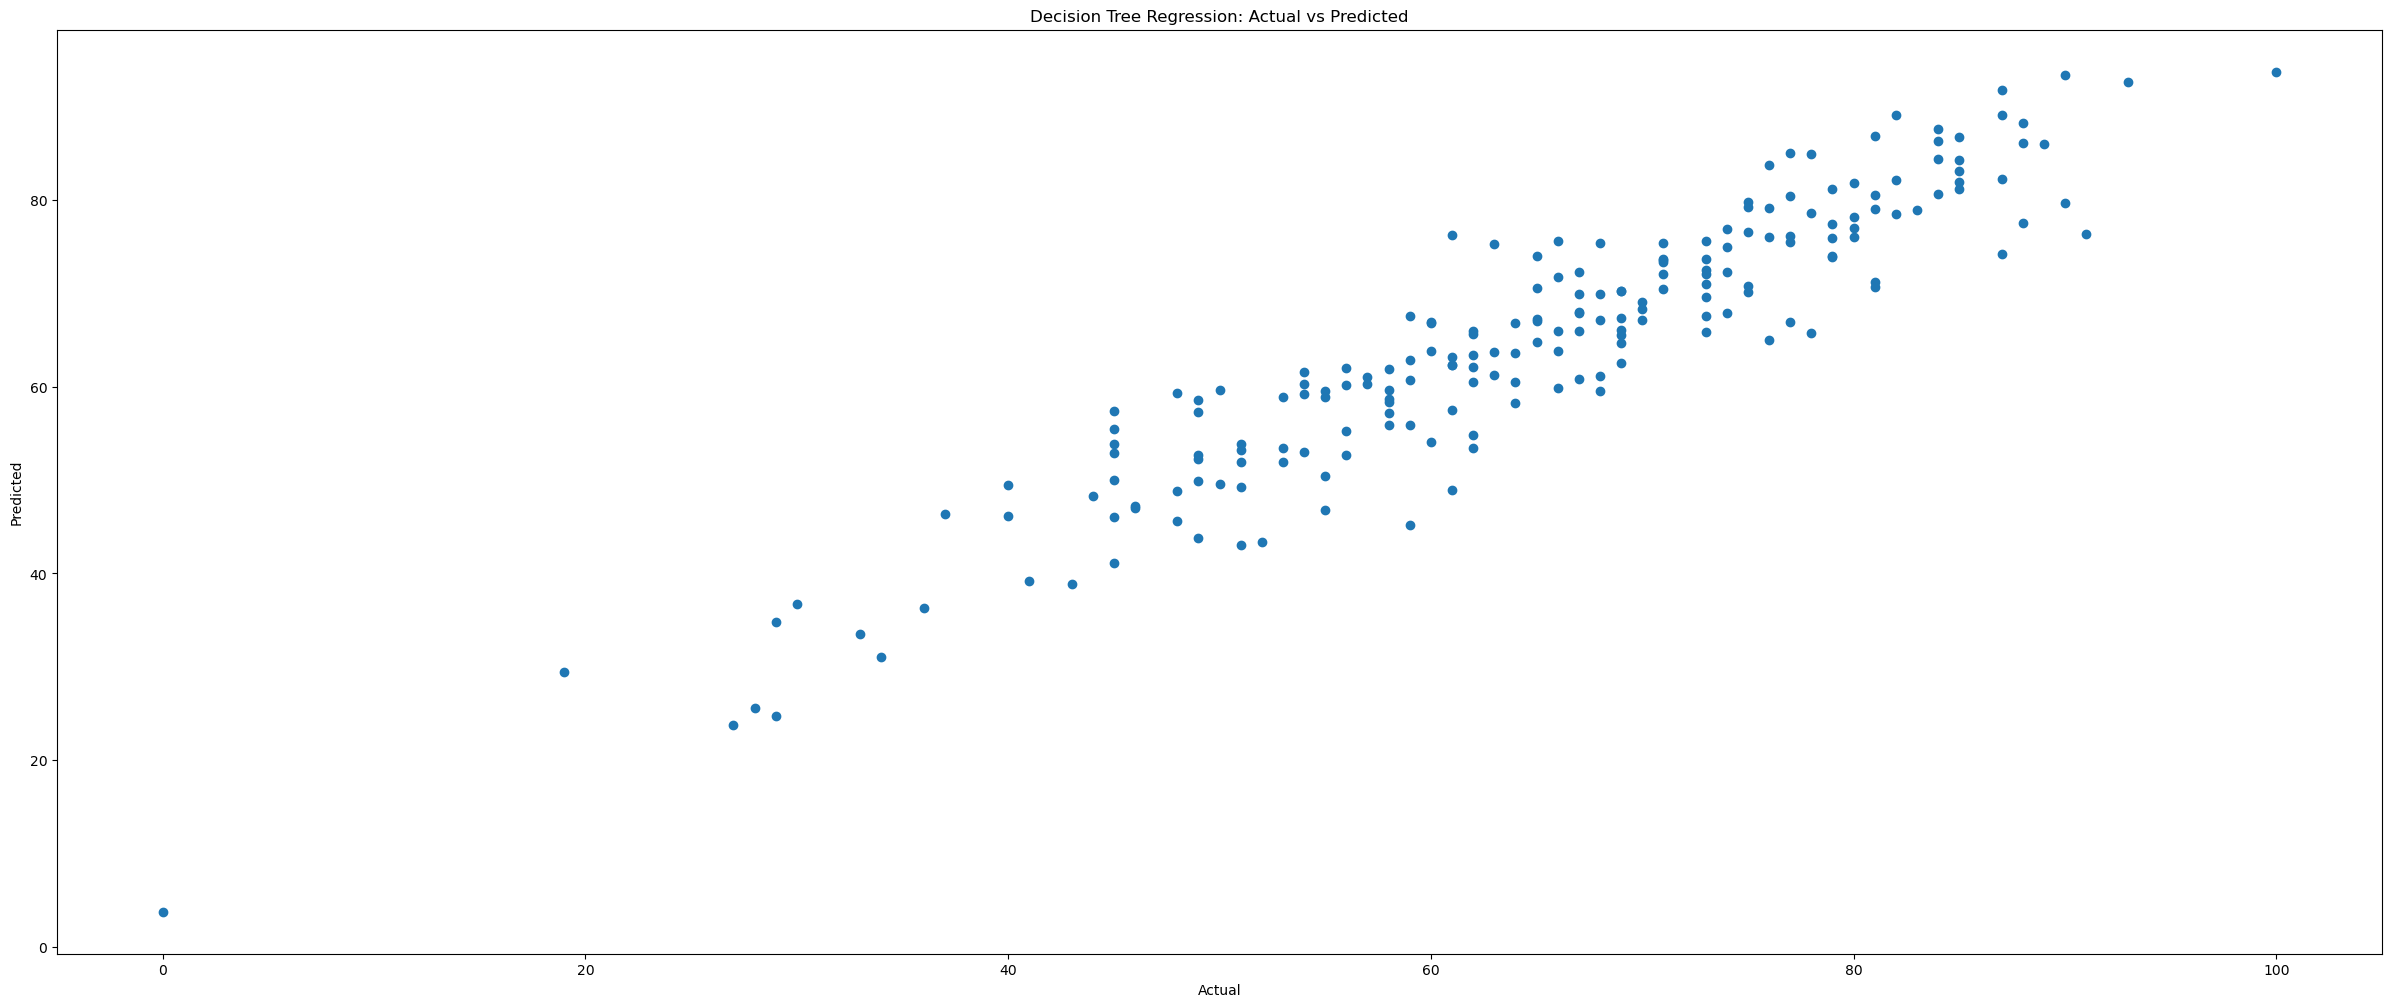

In [46]:
# Plot the actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Decision Tree Regression: Actual vs Predicted')
plt.show()

In [47]:
# Save the trained model to a file
joblib.dump(DT_regressor, 'DT_regressor_model.pkl')

['DT_regressor_model.pkl']

### Random Forest Model

In [48]:
from sklearn.ensemble import RandomForestRegressor
# Train a random forest regression model on the training set
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [49]:
# Make predictions on the testing set
rf_y_pred = rf_regressor.predict(X_test)

In [50]:
# Evaluate the model's performance using mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 29.09516986671545


In [51]:
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error (MAE):', mae)

Mean Absolute Error (MAE): 4.21476314247485


In [52]:
# Calculate the R-squared (R2) score between the actual and predicted target variable values
score = r2_score(y_test, y_pred)
print('R-squared (R2) Score:', score)

R-squared (R2) Score: 0.8804332983749567


In [53]:
#display adjusted R-squared
1 - (1-score)*(len(y)-1)/(len(y)-X.shape[1]-1)

0.8781151684454915

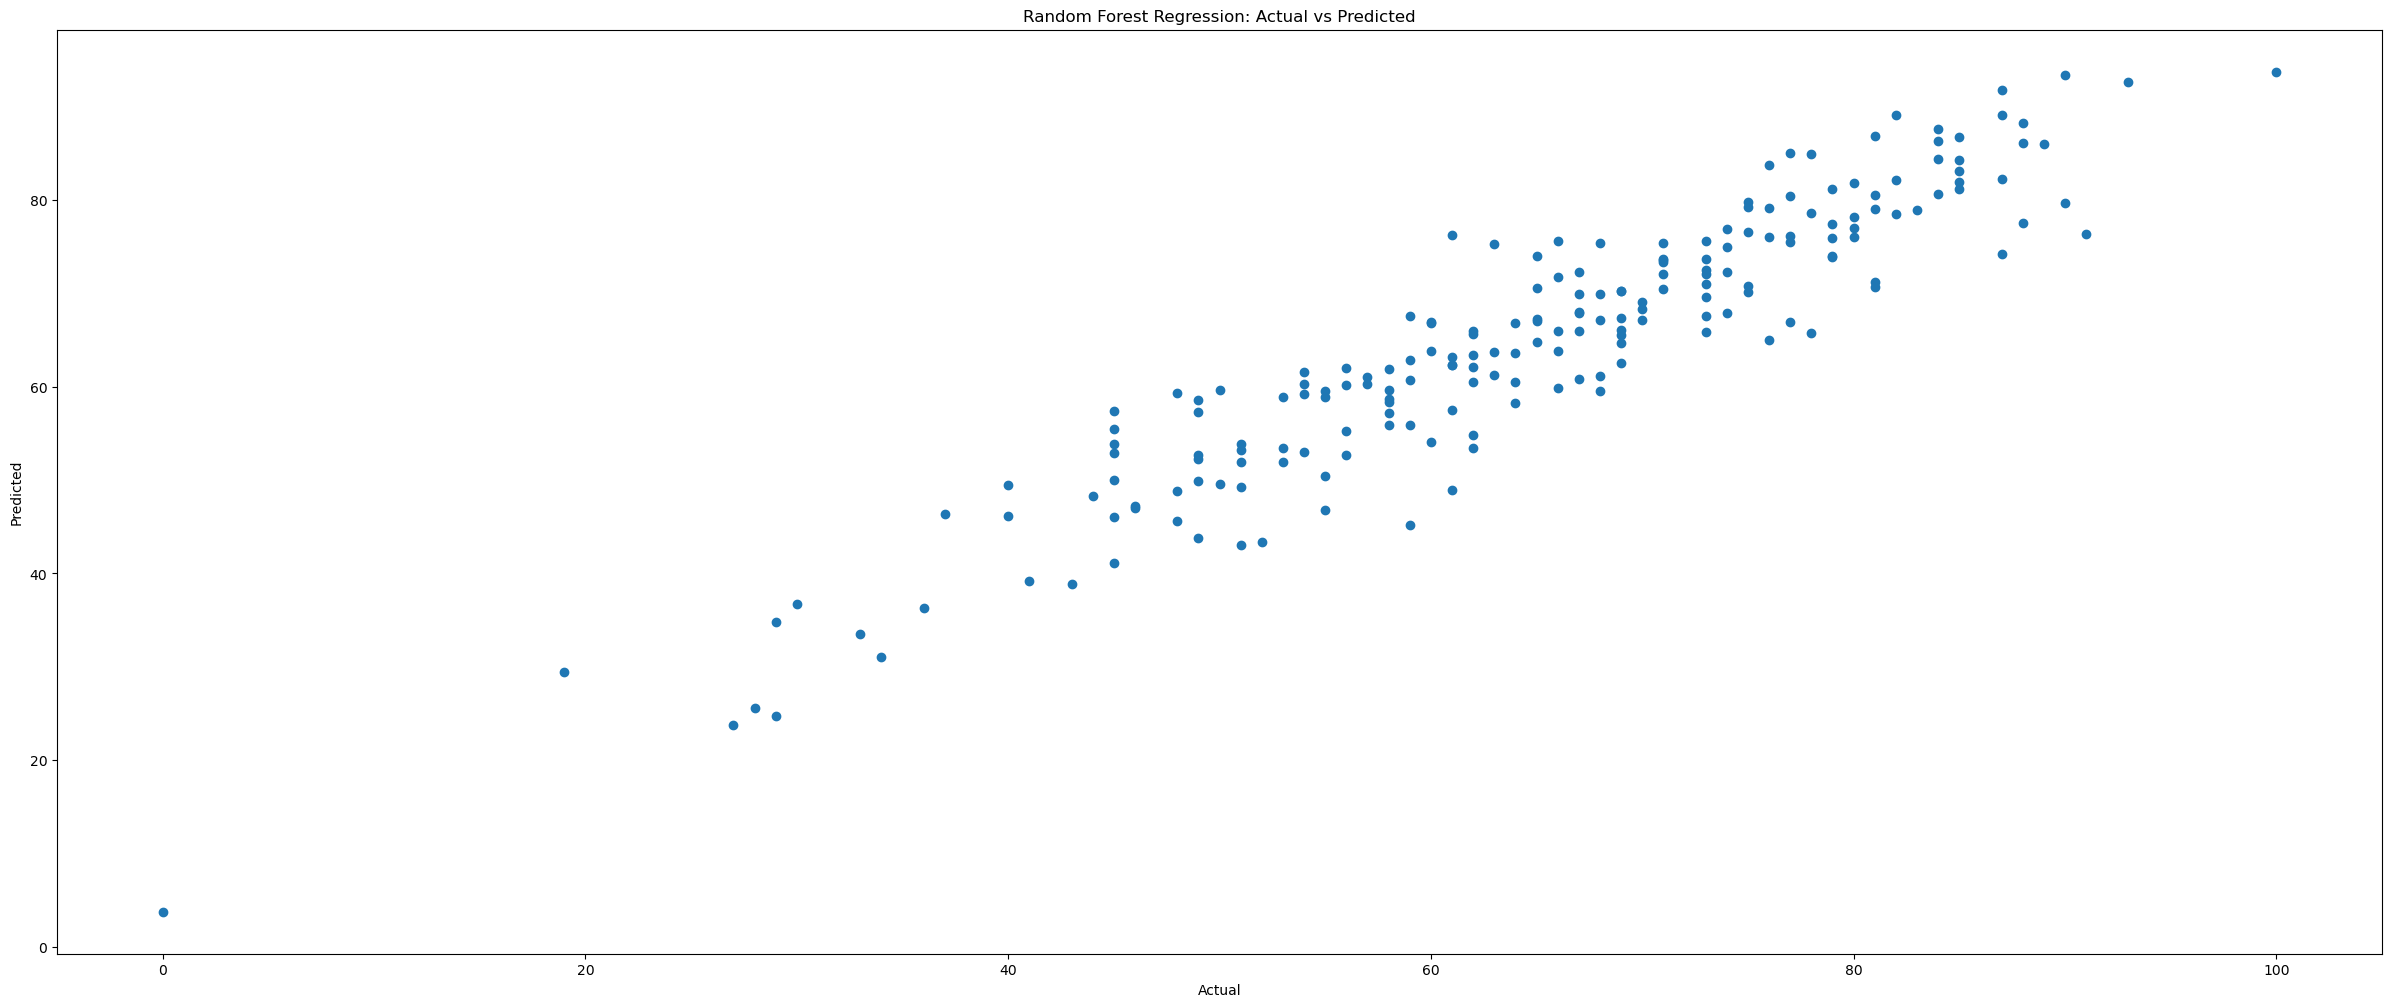

In [54]:
# Plot the actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest Regression: Actual vs Predicted')
plt.show()

In [55]:
# Save the trained model to a file
joblib.dump(rf_regressor, 'rf_regressor_model.pkl')

['rf_regressor_model.pkl']

### K Nearest Neighbor Model


In [56]:
from sklearn.neighbors import KNeighborsRegressor
# Step 1: Create KNN regressor object
k = 3
knn = KNeighborsRegressor(n_neighbors=k)

In [57]:
# Step 2: Fit the model
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [58]:
# Step 3: Make predictions
knn_y_pred = knn.predict(X_test)

In [59]:
# Step 4: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 29.09516986671545


In [60]:
mae = mean_absolute_error(y_test, y_pred)
print('Mean absolute Error:', mse)

Mean absolute Error: 29.09516986671545


In [61]:
# Calculate the R-squared (R2) score between the actual and predicted target variable values
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print('R-squared (R2) Score:', score)

R-squared (R2) Score: 0.8804332983749567


In [62]:
#display adjusted R-squared
1 - (1-score)*(len(y)-1)/(len(y)-X.shape[1]-1)

0.8781151684454915

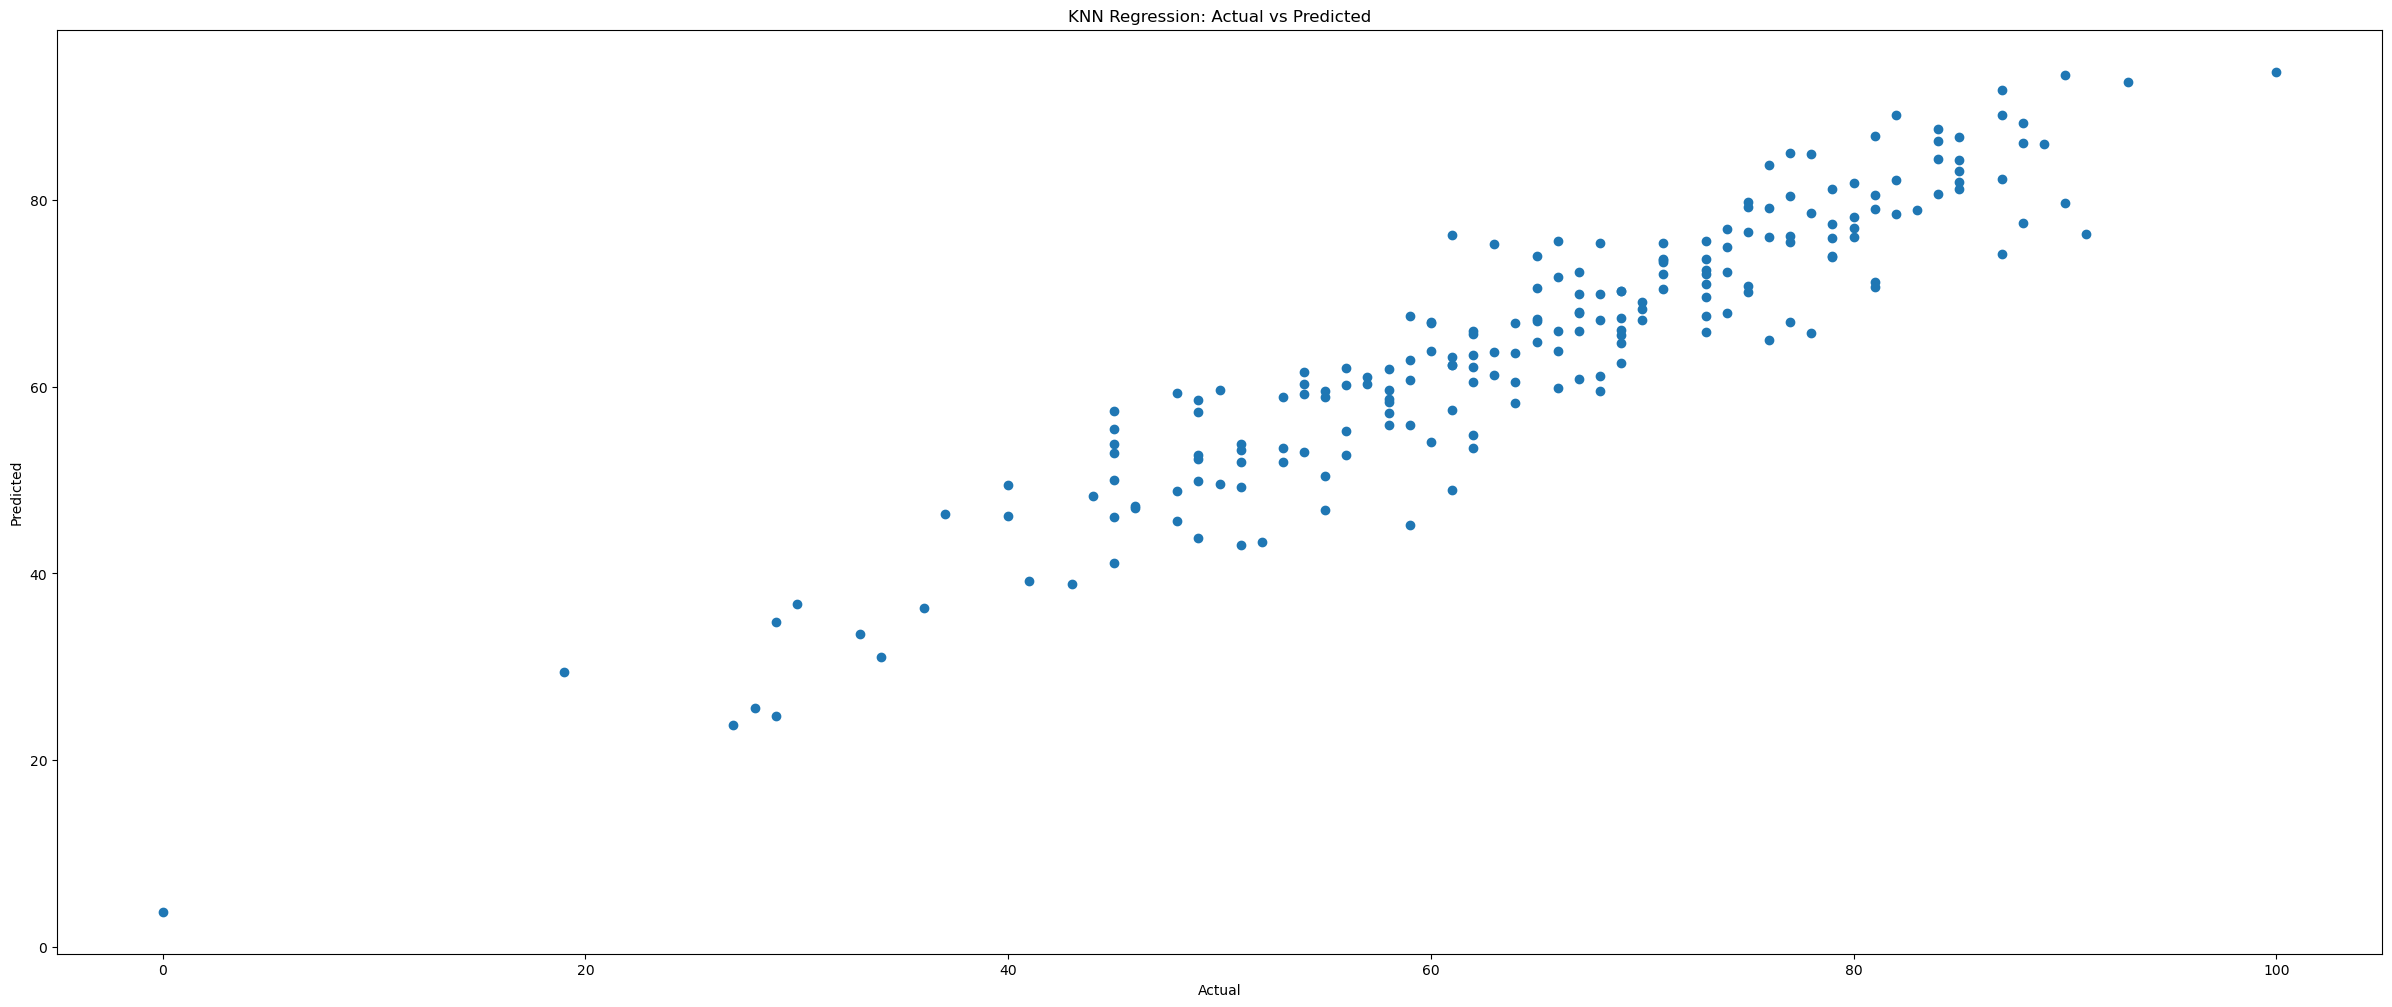

In [63]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('KNN Regression: Actual vs Predicted')
plt.show()

In [64]:
# Save the trained model to a file
joblib.dump(knn, 'knn_model.pkl')

['knn_model.pkl']

### Support Vector Machine

In [65]:
# Import the required libraries
from sklearn.svm import SVR
# Create and train the SVR model
svr = SVR(kernel='rbf', C=1e3, gamma='scale')

In [66]:
svr.fit(X_train, y_train)

SVR(C=1000.0)

In [67]:
# Predict the output for the test data
svm_y_pred = svr.predict(X_test)

In [68]:
#Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 29.09516986671545


In [69]:
mae = mean_absolute_error(y_test, y_pred)
print('Mean absolute Error:', mse)

Mean absolute Error: 29.09516986671545


In [70]:
# Calculate the R-squared (R2) score between the actual and predicted target variable values
score = r2_score(y_test, y_pred)
print('R-squared (R2) Score:', score)

R-squared (R2) Score: 0.8804332983749567


In [71]:
#display adjusted R-squared
1 - (1-score)*(len(y)-1)/(len(y)-X.shape[1]-1)

0.8781151684454915

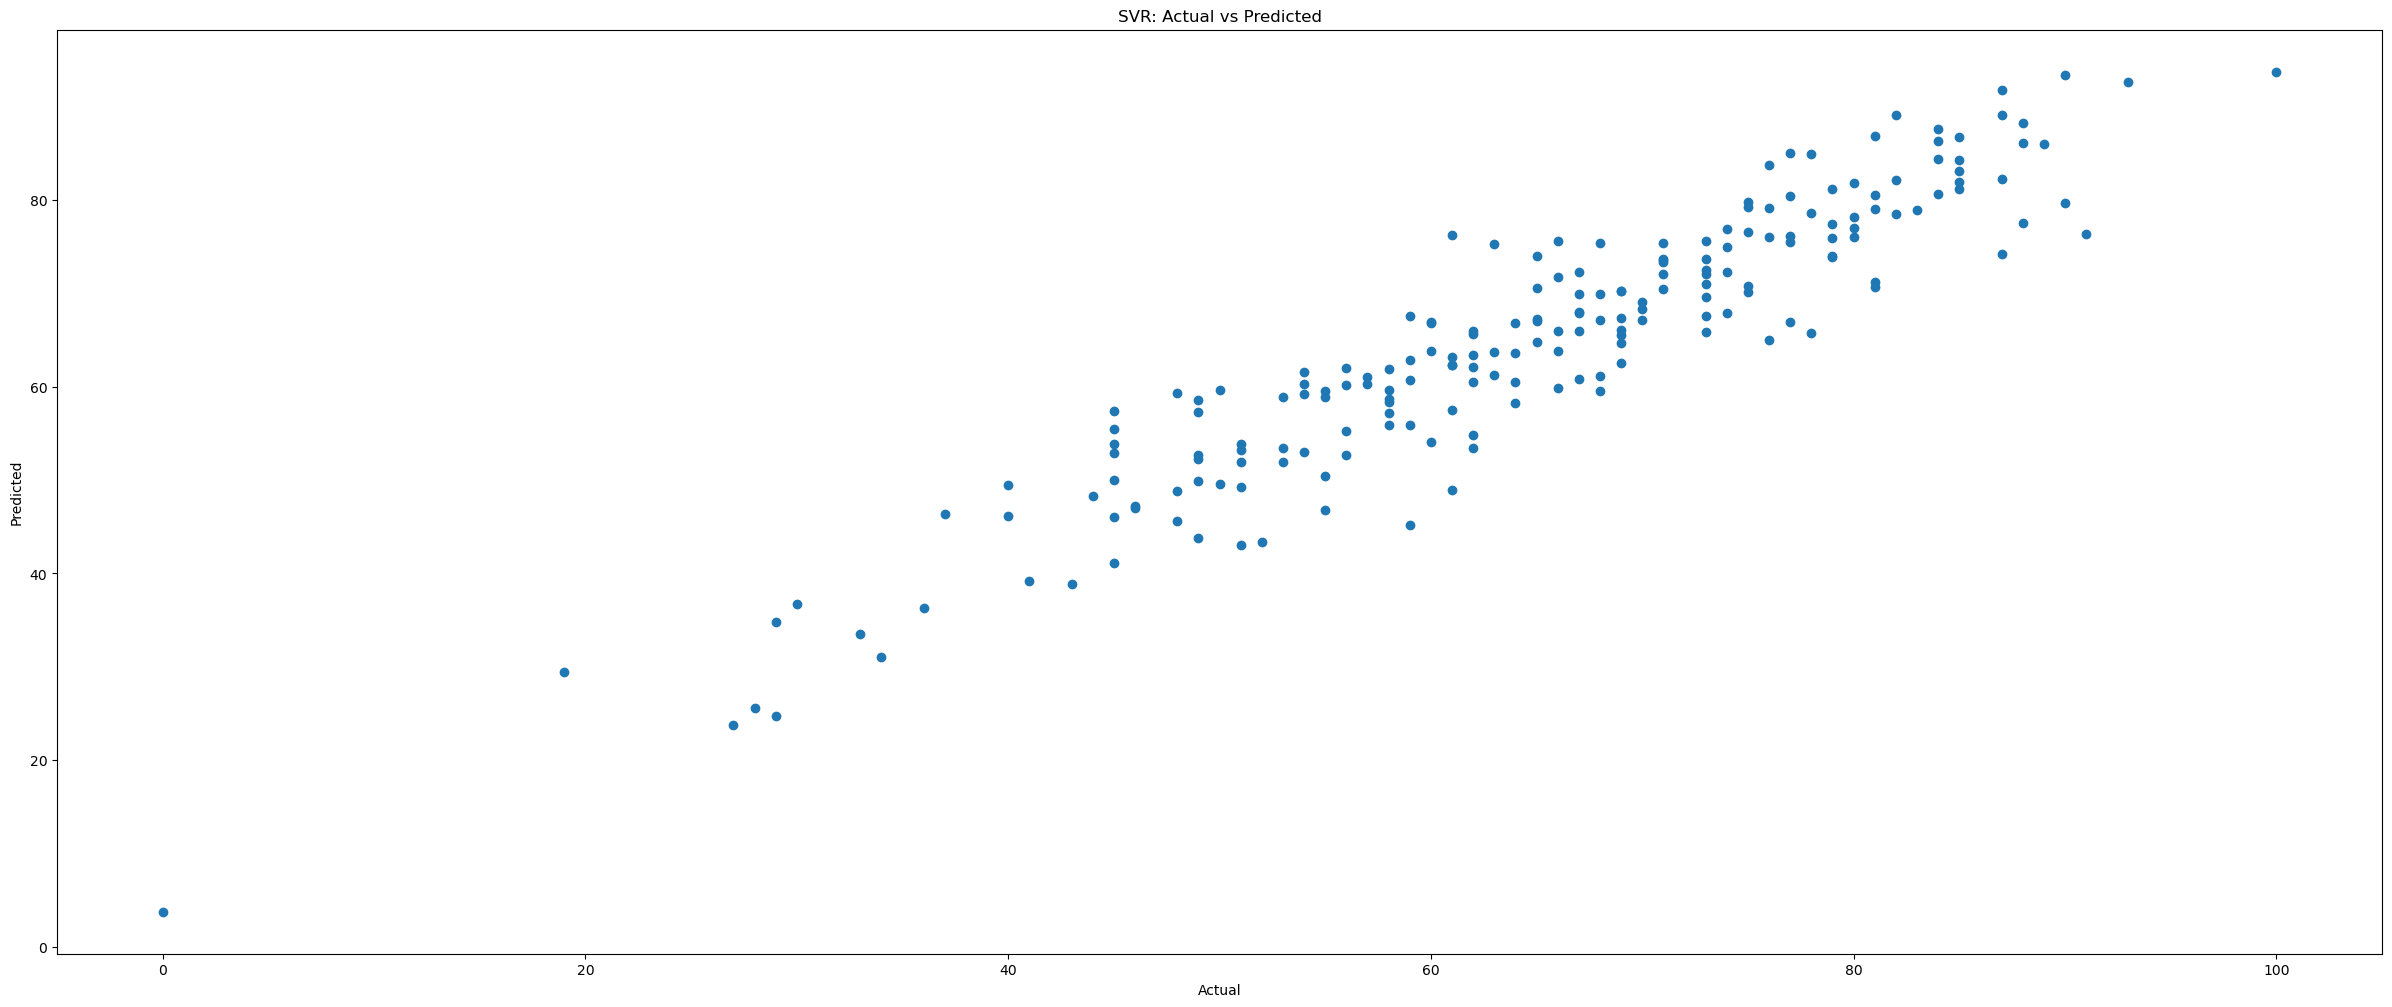

In [72]:
# Plot the actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('SVR: Actual vs Predicted')
plt.show()

In [73]:
# Save the trained model to a file
joblib.dump(svr, 'svr_model.pkl')

['svr_model.pkl']

### Predict new value

In [74]:
input_data = {}

# Prompt the user to enter input values for each feature
input_data["reading_score"] = int(input("Enter the reading score: "))
input_data["writing_score"] = int(input("Enter the writing score: "))

gender = input("Enter the gender (male or female): ")
if gender == 'male':
    input_data["gender_male"] = 1
    input_data["gender_female"] = 0
elif gender == 'female':
    input_data["gender_male"] = 0
    input_data["gender_female"] = 1
else:
    print("Invalid gender. Please try again.")

race_ethnicity_group = input("Enter the race/ethnicity (A, B, C, D, E): ")
input_data.update({
    'race_ethnicity_group A': 0,
    'race_ethnicity_group B': 0,
    'race_ethnicity_group C': 0,
    'race_ethnicity_group D': 0,
    'race_ethnicity_group E': 0
})

if race_ethnicity_group == 'A':
    input_data['race_ethnicity_group A'] = 1
elif race_ethnicity_group == 'B':
    input_data['race_ethnicity_group B'] = 1
elif race_ethnicity_group == 'C':
    input_data['race_ethnicity_group C'] = 1
elif race_ethnicity_group == 'D':
    input_data['race_ethnicity_group D'] = 1
elif race_ethnicity_group == 'E':
    input_data['race_ethnicity_group E'] = 1
else:
    print("Invalid race group. Please try again.")

parental_level_of_education = input("Enter the parental level of education (Associate's degree, Bachelor's degree, High school, Master's degree, Some college, Some high school): ")
input_data.update({
    "parental_level_of_education_associate's degree": 0,
    "parental_level_of_education_bachelor's degree": 0,
    "parental_level_of_education_high school": 0,
    "parental_level_of_education_master's degree": 0,
    "parental_level_of_education_some college": 0,
    "parental_level_of_education_some high school": 0
})

if parental_level_of_education == "Associate's degree":
    input_data["parental_level_of_education_associate's degree"] = 1
elif parental_level_of_education == "Bachelor's degree":
    input_data["parental_level_of_education_bachelor's degree"] = 1
elif parental_level_of_education == "High school":
    input_data["parental_level_of_education_high school"] = 1
elif parental_level_of_education == "Master's degree":
    input_data["parental_level_of_education_master's degree"] = 1
elif parental_level_of_education == "Some college":
    input_data["parental_level_of_education_some college"] = 1
elif parental_level_of_education == "Some high school":
    input_data["parental_level_of_education_some high school"] = 1
else:
    print("Invalid parental_level_of_education. Please try again.")

lunch = input("Enter the lunch (free/reduced or standard): ")
if lunch == 'free/reduced':
    input_data['lunch_free/reduced'] = 1
    input_data['lunch_standard'] = 0
elif lunch == 'standard':
    input_data['lunch_free/reduced'] = 0
    input_data['lunch_standard'] = 1
else:
    print("Invalid lunch. Please try again.")

testprep = input("Enter the test preparation course (completed or none): ")
if testprep == 'completed':
    input_data['test_preparation_course_completed'] = 1
    input_data['test_preparation_course_none'] = 0
elif testprep == 'none':
    input_data['test_preparation_course_completed'] = 0
    input_data['test_preparation_course_none'] = 1
else:
    print("Invalid test preparation course. Please try again.")

print(input_data)

Enter the reading score:  60
Enter the writing score:  50
Enter the gender (male or female):  male
Enter the race/ethnicity (A, B, C, D, E):  A
Enter the parental level of education (Associate's degree, Bachelor's degree, High school, Master's degree, Some college, Some high school):  High school
Enter the lunch (free/reduced or standard):  standard
Enter the test preparation course (completed or none):  none


{'reading_score': 60, 'writing_score': 50, 'gender_male': 1, 'gender_female': 0, 'race_ethnicity_group A': 1, 'race_ethnicity_group B': 0, 'race_ethnicity_group C': 0, 'race_ethnicity_group D': 0, 'race_ethnicity_group E': 0, "parental_level_of_education_associate's degree": 0, "parental_level_of_education_bachelor's degree": 0, 'parental_level_of_education_high school': 1, "parental_level_of_education_master's degree": 0, 'parental_level_of_education_some college': 0, 'parental_level_of_education_some high school': 0, 'lunch_free/reduced': 0, 'lunch_standard': 1, 'test_preparation_course_completed': 0, 'test_preparation_course_none': 1}


In [75]:
input_data

{'reading_score': 60,
 'writing_score': 50,
 'gender_male': 1,
 'gender_female': 0,
 'race_ethnicity_group A': 1,
 'race_ethnicity_group B': 0,
 'race_ethnicity_group C': 0,
 'race_ethnicity_group D': 0,
 'race_ethnicity_group E': 0,
 "parental_level_of_education_associate's degree": 0,
 "parental_level_of_education_bachelor's degree": 0,
 'parental_level_of_education_high school': 1,
 "parental_level_of_education_master's degree": 0,
 'parental_level_of_education_some college': 0,
 'parental_level_of_education_some high school': 0,
 'lunch_free/reduced': 0,
 'lunch_standard': 1,
 'test_preparation_course_completed': 0,
 'test_preparation_course_none': 1}

In [76]:
# Convert the input_data dictionary into a numerical array
input_array = np.array(list(input_data.values())).reshape(1, -1)

In [77]:
# Perform the prediction using the trained model and display the predicted score
predicted_score_Linear_Regression=regression.predict(input_array)
print(predicted_score_Linear_Regression)

predicted_score_Linear_Regression_DT= DT_regressor.predict(input_array)
print(predicted_score_Linear_Regression_DT)

predicted_score_Regression_rf = rf_regressor.predict(input_array)
print(predicted_score_Regression_rf)

predicted_score__Regression_Knn = knn.predict(input_array)
print(predicted_score__Regression_Knn)

predicted_score_Regression_Svm = svr.predict(input_array)
print(predicted_score_Regression_Svm)

[47.18528275]
[51.]
[45.67]
[52.]
[49.3336552]


C:\Users\moham\anaconda3\envs\Ai\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\moham\anaconda3\envs\Ai\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\moham\anaconda3\envs\Ai\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\moham\anaconda3\envs\Ai\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\moham\anaconda3\envs\Ai\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


In [78]:
predicted_score = np.mean([predicted_score_Linear_Regression,predicted_score_Linear_Regression_DT,predicted_score_Regression_rf ,predicted_score__Regression_Knn,predicted_score_Regression_Svm], axis=0)
print("Predicted score:", predicted_score)

Predicted score: [49.03778759]


Flask Api

In [ ]:
from flask import Flask, request, jsonify
# Load the trained machine learning model
model = joblib.load('svr_model.pkl')
app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    input_data = {}

    input_data["reading_score"] = int(input("Enter the reading score: "))
    input_data["writing_score"] = int(input("Enter the writing score: "))
    
    gender = input("Enter the gender (male or female): ")
    if gender == 'male':
        input_data["gender_male"] = 1
        input_data["gender_female"] = 0
    elif gender == 'female':
        input_data["gender_male"] = 0
        input_data["gender_female"] = 1
    else:
        print("Invalid gender. Please try again.")
    
    race_ethnicity_group = input("Enter the race/ethnicity (A, B, C, D, E): ")
    input_data.update({
        'race_ethnicity_group A': 0,
        'race_ethnicity_group B': 0,
        'race_ethnicity_group C': 0,
        'race_ethnicity_group D': 0,
        'race_ethnicity_group E': 0
    })
    
    if race_ethnicity_group == 'A':
        input_data['race_ethnicity_group A'] = 1
    elif race_ethnicity_group == 'B':
        input_data['race_ethnicity_group B'] = 1
    elif race_ethnicity_group == 'C':
        input_data['race_ethnicity_group C'] = 1
    elif race_ethnicity_group == 'D':
        input_data['race_ethnicity_group D'] = 1
    elif race_ethnicity_group == 'E':
        input_data['race_ethnicity_group E'] = 1
    else:
        print("Invalid race group. Please try again.")
    
    parental_level_of_education = input("Enter the parental level of education (Associate's degree, Bachelor's degree, High school, Master's degree, Some college, Some high school): ")
    input_data.update({
        "parental_level_of_education_associate's degree": 0,
        "parental_level_of_education_bachelor's degree": 0,
        "parental_level_of_education_high school": 0,
        "parental_level_of_education_master's degree": 0,
        "parental_level_of_education_some college": 0,
        "parental_level_of_education_some high school": 0
    })
    
    if parental_level_of_education == "Associate's degree":
        input_data["parental_level_of_education_associate's degree"] = 1
    elif parental_level_of_education == "Bachelor's degree":
        input_data["parental_level_of_education_bachelor's degree"] = 1
    elif parental_level_of_education == "High school":
        input_data["parental_level_of_education_high school"] = 1
    elif parental_level_of_education == "Master's degree":
        input_data["parental_level_of_education_master's degree"] = 1
    elif parental_level_of_education == "Some college":
        input_data["parental_level_of_education_some college"] = 1
    elif parental_level_of_education == "Some high school":
        input_data["parental_level_of_education_some high school"] = 1
    else:
        print("Invalid parental_level_of_education. Please try again.")
    
    lunch = input("Enter the lunch (free/reduced or standard): ")
    if lunch == 'free/reduced':
        input_data['lunch_free/reduced'] = 1
        input_data['lunch_standard'] = 0
    elif lunch == 'standard':
        input_data['lunch_free/reduced'] = 0
        input_data['lunch_standard'] = 1
    else:
        print("Invalid lunch. Please try again.")
    
    testprep = input("Enter the test preparation course (completed or none): ")
    if testprep == 'completed':
        input_data['test_preparation_course_completed'] = 1
        input_data['test_preparation_course_none'] = 0
    elif testprep == 'none':
        input_data['test_preparation_course_completed'] = 0
        input_data['test_preparation_course_none'] = 1
    else:
        print("Invalid test preparation course. Please try again.")
            
    # Convert the input_data dictionary into a numerical array
    input_array = np.array(list(input_data.values())).reshape(1, -1)

    # Make predictions using the loaded model
    prediction = model.predict(input_array)

    # Prepare the response
    response = {'prediction': prediction.tolist()}


    return jsonify(response)


if __name__ == '__main__':
    app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit


Enter the reading score:  60
Enter the writing score:  50
Enter the gender (male or female):  male
Enter the race/ethnicity (A, B, C, D, E):  A
Enter the parental level of education (Associate's degree, Bachelor's degree, High school, Master's degree, Some college, Some high school):  High school
Enter the lunch (free/reduced or standard):  standard
Enter the test preparation course (completed or none):  none


C:\Users\moham\anaconda3\envs\Ai\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
127.0.0.1 - - [27/Apr/2024 12:47:54] "POST /predict HTTP/1.1" 200 -
